**Importing libraries and data**

In [25]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import bds

In [26]:
minlyData = pd.read_csv("../../dataset/cleaned.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])
dailyData = pd.read_csv("../../dataset/dailyData.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])
weeklyData = pd.read_csv("../../dataset/weeklyData.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])
monthlyData = pd.read_csv("../../dataset/monthlyData.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])


**Decomposing the signal and identifying seaonal period**


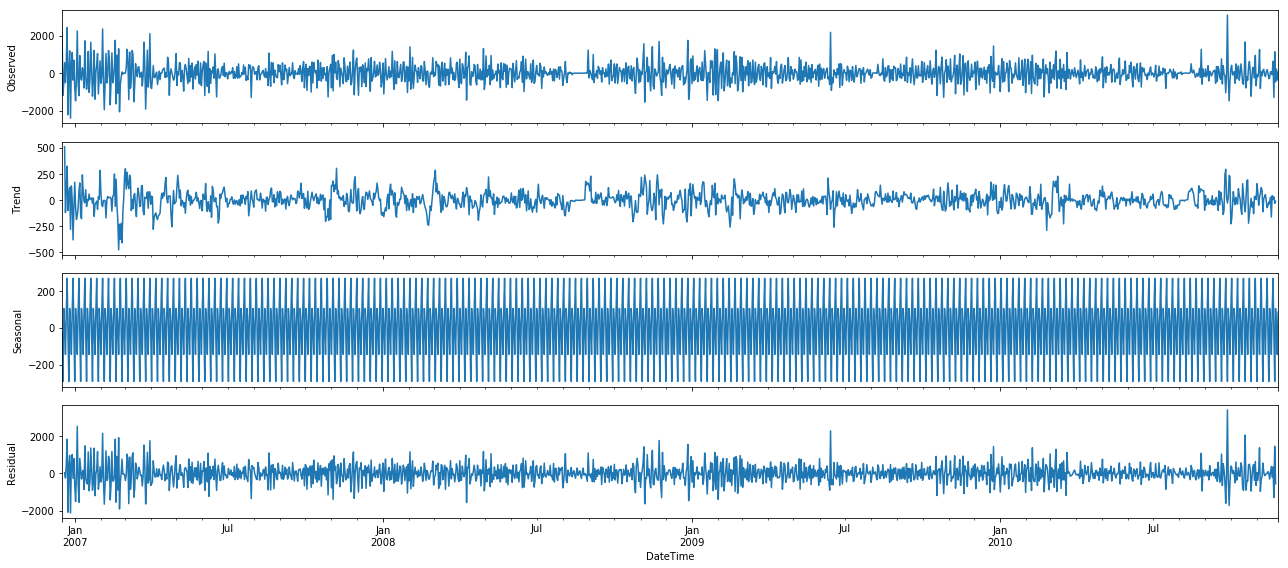

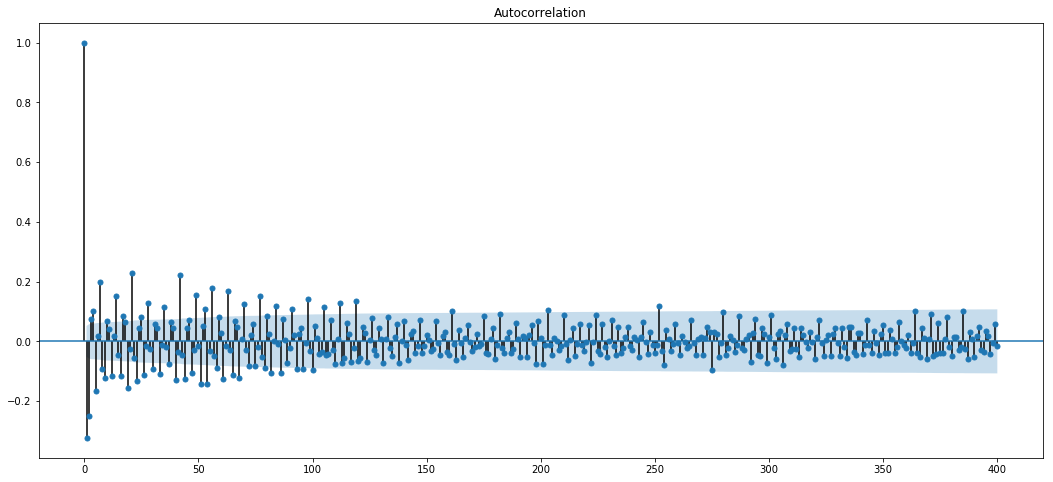

In [27]:

dailyGAP = dailyData['Global_active_power'].diff()[1:] 

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(dailyGAP, model='additive')
fig = decomposition.plot()
plt.show()

dailyACF = plot_acf(dailyGAP, lags=400)

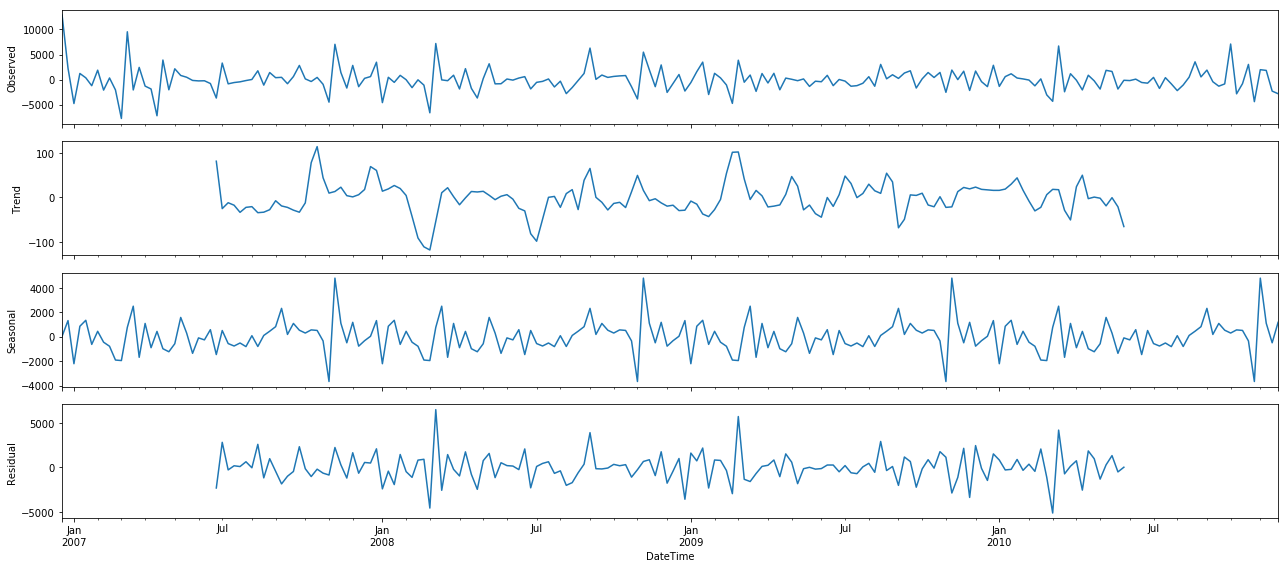

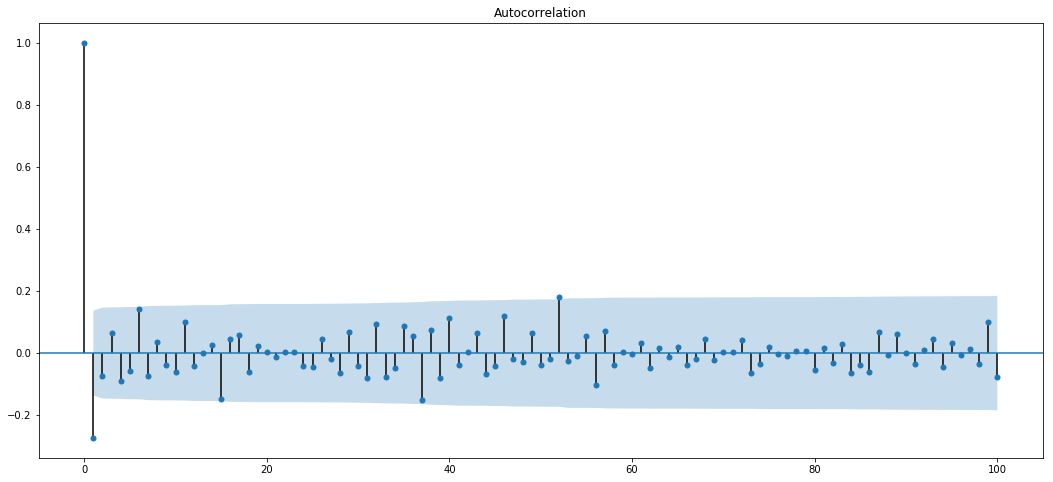

In [28]:

weeklyGAP = weeklyData['Global_active_power'].diff()[1:]

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(weeklyGAP, model='additive')
fig = decomposition.plot()
plt.show()

weeklyACF = plot_acf(weeklyGAP, lags = 100)

**Analysis**
<br>
The data when sampled weekly has as strong seasonal component and non-uniform trend. It also has a residual of high magnitude. This conveys that better methods are needed to predict this time series than AR or MA. ARIMA with a higher order of integration is needed. As differencing is likely to make the series stationary. 

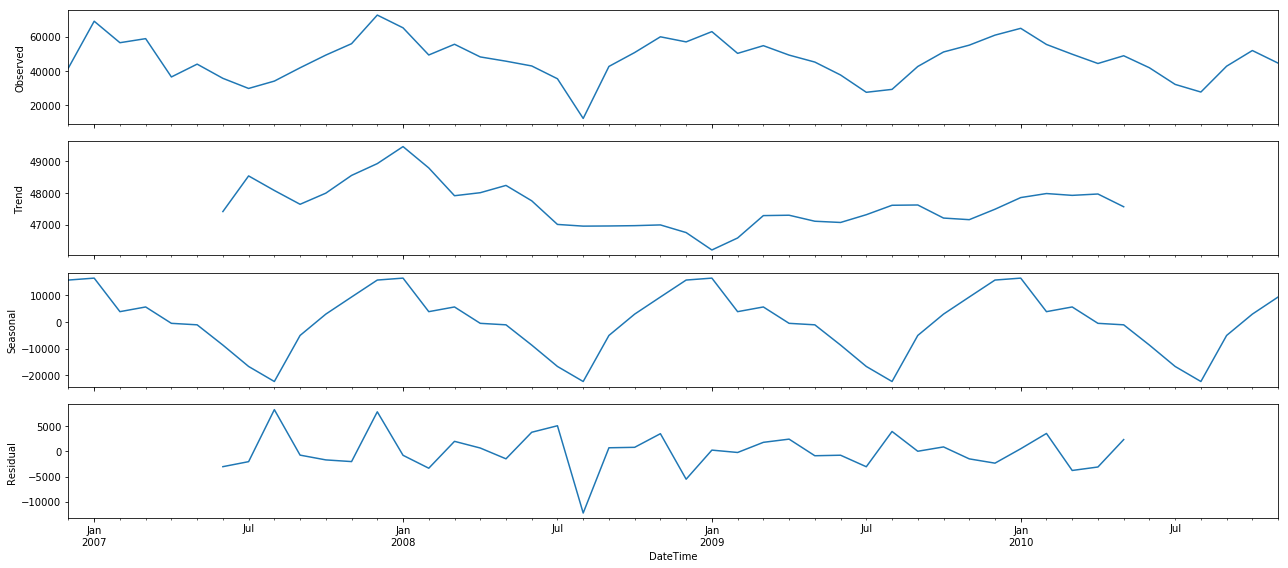

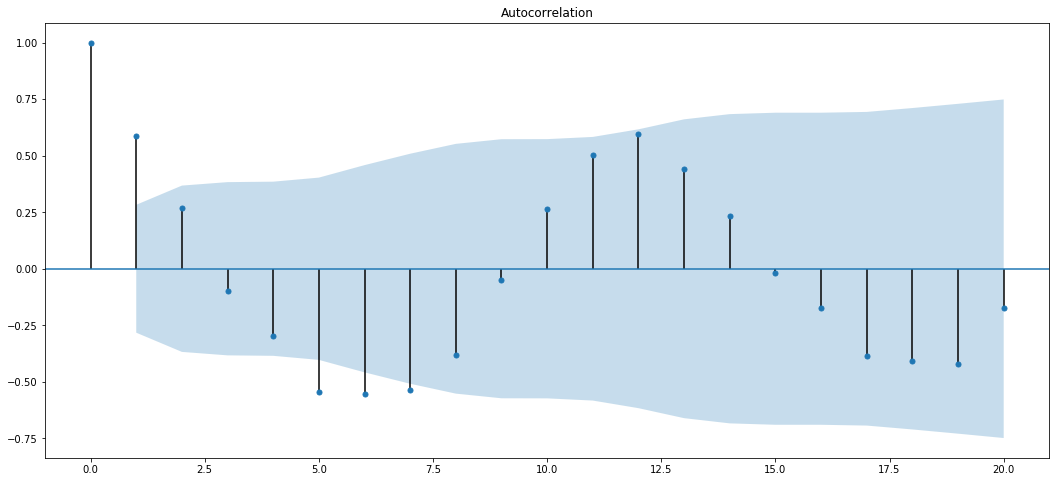

In [29]:

monthlyGAP = monthlyData['Global_active_power']

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(monthlyGAP, model='additive')
fig = decomposition.plot()
plt.show()

monthlyACF = plot_acf(monthlyGAP, lags = 20)

**Performing test for linearity of given data**

In [30]:
# For daily data

bds_stat_daily, pvalue_daily = bds(dailyGAP)
print(pvalue_daily)
if (pvalue_daily < 0.05):
    print("Daily Data is Non Linear")
else:
    print("Daily Data is Linear")

print('')

3.6727329752132416e-29
Daily Data is Non Linear



In [31]:
# For weekly data

bds_stat_weekly, pvalue_weekly = bds(weeklyGAP)
print(pvalue_weekly)
if (pvalue_weekly < 0.05):
    print("Weekly Data is Non Linear")
else:
    print("Weekly Data is Linear")

print('')

7.006922427051028e-05
Weekly Data is Non Linear



In [32]:
# For monthly data

bds_stat_monthly, pvalue_monthly = bds(monthlyGAP)
print(pvalue_monthly)
if (pvalue_monthly < 0.05):
    print("Monthly Data is Non Linear")
else:
    print("Monthly Data is Linear")
    
print('')

9.864127440856745e-07
Monthly Data is Non Linear



**Linearity of data**<br>
The BDS test indicates that the data is non-stationary. This means that a regression model cannot model the non-linear part of the data. Hence it requires the help of a neural network which has the capability to model non-linear data.